<a href="https://colab.research.google.com/github/ShwetaNikam15/NNDL_2022/blob/main/exp1_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implementation of ANN - Customer churn prediction using dataset for Bank**


**Aim:** To predict customer churn using ANN for the Dataset of the bank

**Theory:**

To build the artificial neural network that will forecast client attrition. First and leading, we will want a dataset on which to run our plan of action.

So we will start with the dataset, we will use the telecom customer churn dataset which was taken from the kaggle. The dataset contains several features based on those features we have to predict the customer churn.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/bank_customer.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Drop rows that are not required

In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

**Visualization**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


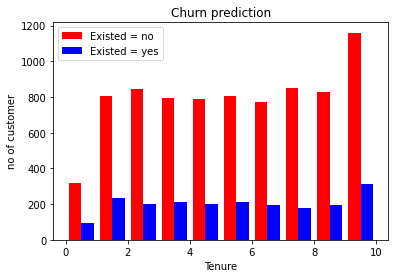

In [6]:
existed_yes = df[df['Exited']== 1].Tenure 
existed_no = df[df['Exited']== 0].Tenure 
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([existed_no,existed_yes], color = ['red', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


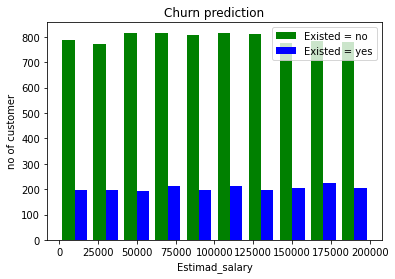

In [7]:
salary_no_existed = df[df.Exited== 0].EstimatedSalary
salary_yes_existed = df[df.Exited== 1].EstimatedSalary
plt.xlabel('Estimad_salary')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([salary_no_existed,salary_yes_existed], color = ['green', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

**Converting categorical to numerical**

In [8]:
df.Gender = df.Gender.map({'Female':1, 'Male':0}) 
df = pd.get_dummies(data=df, columns=['Geography'])

In [9]:
scaler = MinMaxScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Model Training**

In [11]:
x = df.drop('Exited', axis = 1) 
y = df.Exited
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
x_train.shape

(7500, 12)

In [13]:
x_test.shape

(2500, 12)

In [14]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5096 - accuracy: 0.7843
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7956
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7991
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8004
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8064
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8103
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8140
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8167
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8188
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4136 - accura

In [15]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8648


[0.3266063630580902, 0.864799976348877]

In [16]:
yp = model.predict(x_test)
yp[:5]

array([[0.26114982],
       [0.46384877],
       [0.00613427],
       [0.0058822 ],
       [0.82317454]], dtype=float32)

In [17]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2005
           1       0.78      0.44      0.57       495

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.74      2500
weighted avg       0.86      0.86      0.85      2500



Text(69.0, 0.5, 'Truth')

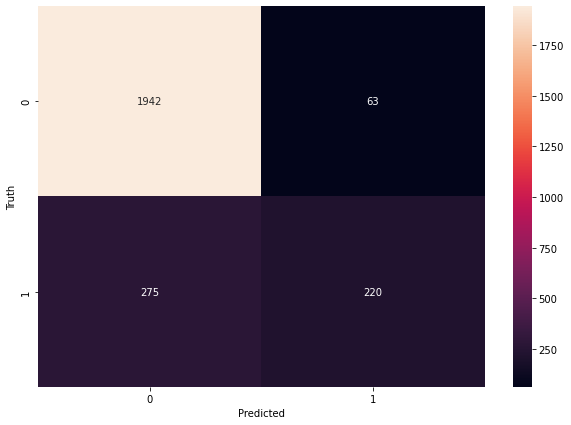

In [19]:
import seaborn as sn
from matplotlib  import pyplot as plt

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Accuracy**

In [20]:
round((1922+229)/(1922+229+275+74),2)

0.86

**Precision for 0 class. i.e. Precision for customers who did not**

In [21]:
round(1922/(1922+275),2)

0.87

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [22]:
round(229/(229+74),2)

0.76

**Recall for 0 class**



In [23]:
round(1922/(1922+74),2)

0.96

In [24]:
round(229/(229+275),2)

0.45

**Conclusion:**

we have implemented ANN to predict customer churn for the Dataset of the bank